# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1


In [7]:
number_data_test

200

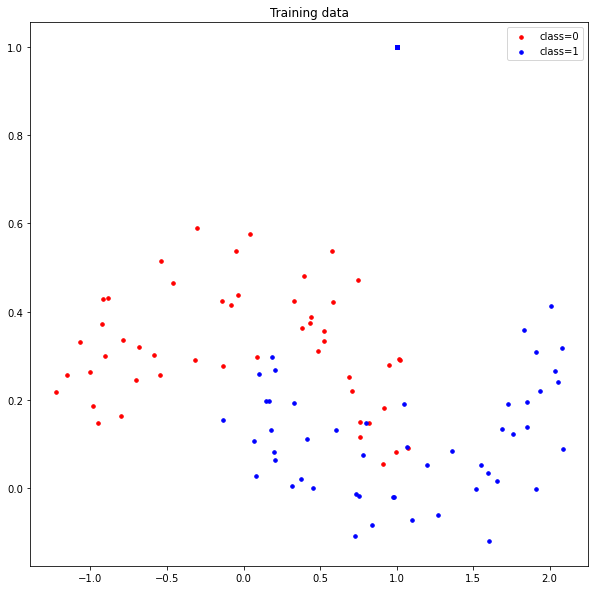

In [2]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

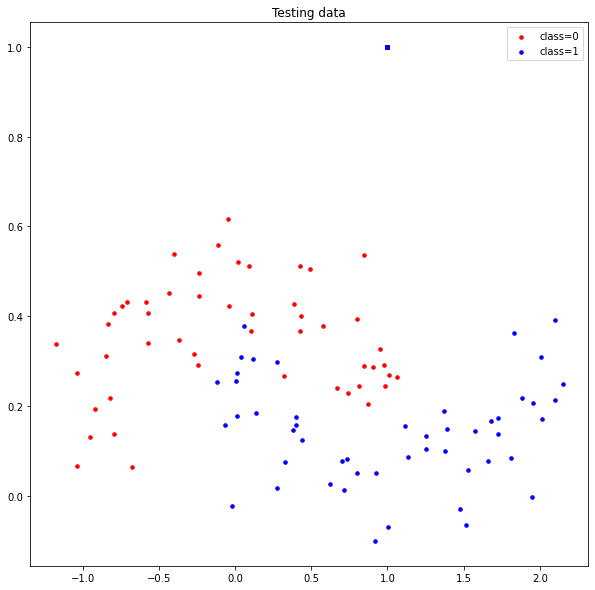

In [5]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## equation

In [252]:
# sigmoid function
def sigmoid(z):
    overflow=(z>-709).flatten()
    sigmoid_f= np.zeros(z.shape)
    sigmoid_f[overflow] =1/(1+np.exp(-z[overflow]))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p


# loss function definition
def loss_logreg(X,y,w,lambda_): 
    loss=np.mean(-y*np.log(f_pred(X,w)+1e-30)-(1-y)*np.log(1-f_pred(X,w)+1e-30))+lambda_*np.sum(w*w)/2
    return loss


# gradient function definition
def grad_loss(X,y,w,lambda_):
    n = len(y)
    grad =  np.dot(X.T,(f_pred(X,w)-y))/n*2+lambda_*w
    return grad


# gradient descent function definition
def grad_desc(X_train, X_test, y_train, y_test , w_init, tau, max_iter,lambda_):

    L_iters_train = np.zeros([max_iter])# record the loss values
    L_iters_test = np.zeros([max_iter])
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        grad_f = grad_loss(X_train,y_train,w,lambda_) # gradient of the loss
        w =  w - tau* grad_f # update rule of gradient descent  
        L_iters_train[i] =  loss_logreg(X_train,y_train,w,lambda_)# save the current loss value 
        L_iters_test[i] =  loss_logreg(X_test,y_test,w,lambda_)# save the current loss value 
    return w, L_iters_train, L_iters_test

In [194]:
print(w_init.shape)
X_train.shape

(100, 1)


(200, 100)

In [196]:
z=np.dot(X_train,w_init)
overflow=(z>-709).flatten()
print(overflow.shape)
sigmoid_f= np.zeros(z.shape)
sigmoid_f.shape
sigmoid_f[overflow] =1/(1+np.exp(-z[overflow]))

(200,)


## define function

In [229]:
def makeArray(x1,x2):
    X = np.ones([number_data_test,100])

    for i in range(10):
        for j in range(10):
            X[:,10*i+j]=X[:,10*i+j]*np.power(x1,i)*np.power(x2,j)
    return X
            
def makeArray2(x1,x2):
    X = np.ones([2500,100])

    for i in range(10):
        for j in range(10):
            X[:,10*i+j]=X[:,10*i+j]*np.power(x1,i)*np.power(x2,j)
    return X
            

In [230]:
X_train=makeArray(x1_train,x2_train)
X_test=makeArray(x1_test,x2_test)

In [231]:
y_train = data_train[:,2].reshape(-1,1)
y_test = data_test[:,2].reshape(-1,1)

In [232]:
len(y_test)
lambda_=0.00001

In [233]:
w_init=np.ones([100,1])*0.3


In [234]:
np.sum(w_init*w_init)

8.999999999999998

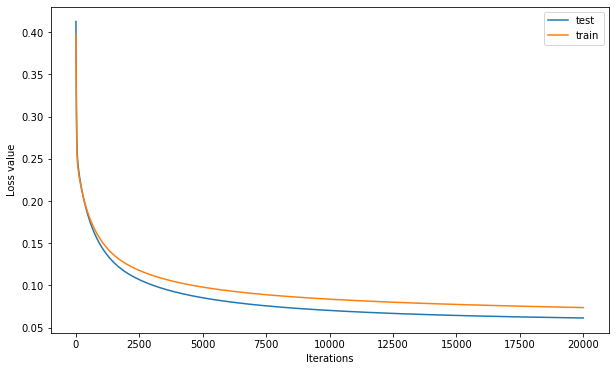

In [253]:
w_e5, L_iters_train_e5, L_iters_test_e5 = grad_desc(X_train, X_test, y_train, y_test , w_init, tau=0.1, max_iter=20000, lambda_=0.00001)
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e5, label="test")
plt.plot(L_iters_train_e5, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

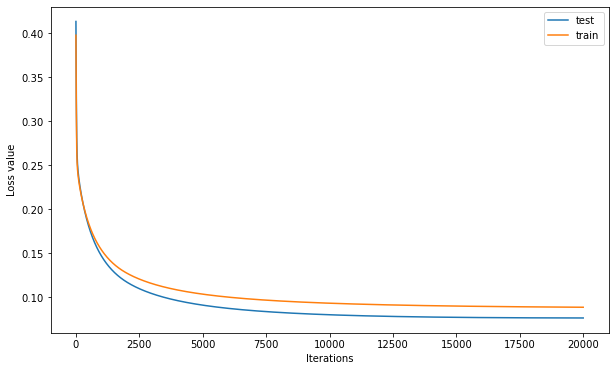

In [254]:
w_e4, L_iters_train_e4, L_iters_test_e4 = grad_desc(X_train, X_test, y_train, y_test , w_init, tau=0.1, max_iter=20000, lambda_=0.0001)
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e4, label="test")
plt.plot(L_iters_train_e4, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

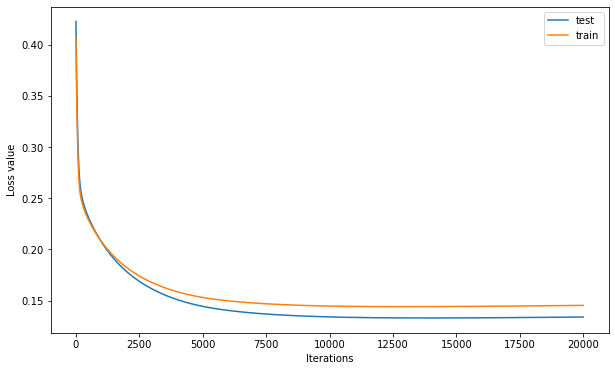

In [265]:
w_e3, L_iters_train_e3, L_iters_test_e3 = grad_desc(X_train, X_test, y_train, y_test , w_init, tau=0.03, max_iter=20000, lambda_=0.001)
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e3, label="test")
plt.plot(L_iters_train_e3, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

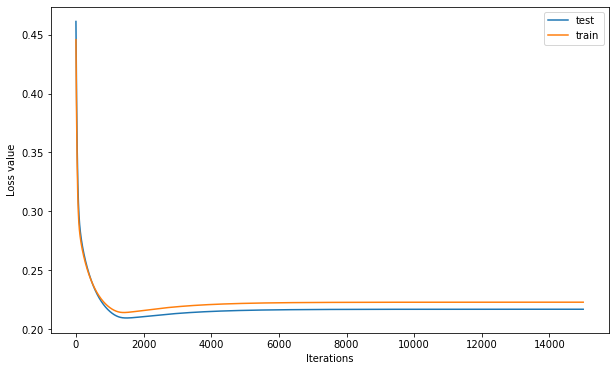

In [269]:
w_e2, L_iters_train_e2, L_iters_test_e2 = grad_desc(X_train, X_test, y_train, y_test , w_init, tau=0.05, max_iter=15000, lambda_=0.01)
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e2, label="test")
plt.plot(L_iters_train_e2, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

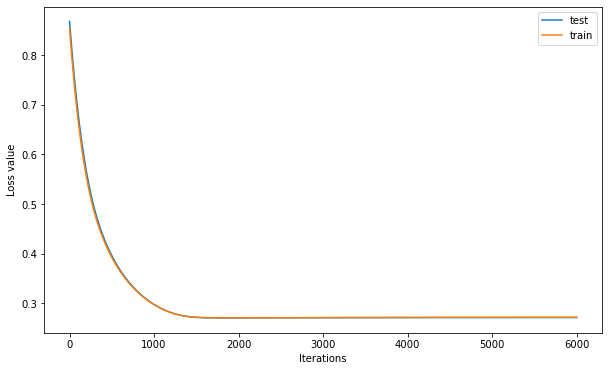

In [270]:
w_e1, L_iters_train_e1, L_iters_test_e1 = grad_desc(X_train, X_test, y_train, y_test , w_init, tau=0.01, max_iter=6000, lambda_=0.1)
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e1, label="test")
plt.plot(L_iters_train_e1, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [275]:
def makeArray2(x1,x2):
    X = np.ones([2500,100])

    for i in range(10):
        for j in range(10):
            X[:,10*i+j]=X[:,10*i+j]*np.power(x1,i)*np.power(x2,j)
    return X

array([[1.62480369e-11],
       [2.12908866e-08],
       [3.54074550e-06],
       ...,
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00]])

In [284]:
def plotColorMap(w):
    plt.figure(figsize=(24,10))
    plt.subplot(1,2,1)
    x1_min, x1_max = x1_train.min(), x1_train.max() # min and max of grade 1
    x2_min, x2_max = x2_train.min(), x2_train.max() # min and max of grade 2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))  # create meshgrid
    x1_1=xx1.reshape(-1)
    x2_1=xx2.reshape(-1)

    X2_train=makeArray2(x1_1,x2_1)
    p=f_pred(X2,w).reshape(50,50)


    ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.4)
    cbar = plt.colorbar(ax)
    cbar.update_ticks()

    plt.scatter(  x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
    plt.scatter(  x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
    plt.contour(xx1, xx2, p, levels=[0.5], linewidths=2, colors='k') 
    plt.legend()
    plt.title('train')

    plt.subplot(1,2,2)

    ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.4)
    cbar = plt.colorbar(ax)
    cbar.update_ticks()

    plt.scatter(  x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
    plt.scatter(  x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
    plt.contour(xx1, xx2, p, levels=[0.5], linewidths=2, colors='k') 
    plt.legend()
    plt.title('test')
    plt.show()

## Output using the dataset
<hr>

## 1. Plot the training data [0.5pt]

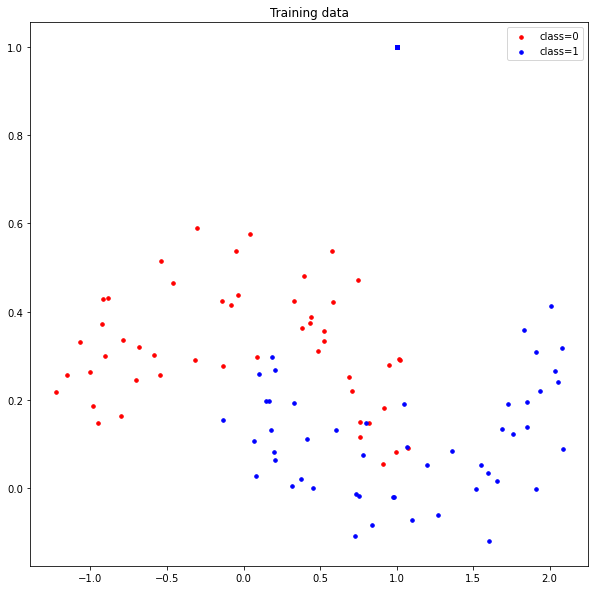

In [4]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the testing data [0.5pt]

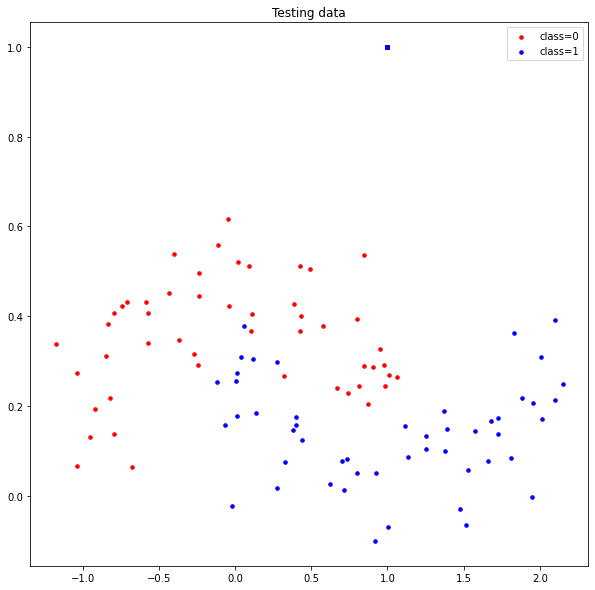

In [8]:
plt.figure(1,figsize=(10,10))
plt.scatter(  x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(  x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## 3. Plot the learning curve with λ=0.00001

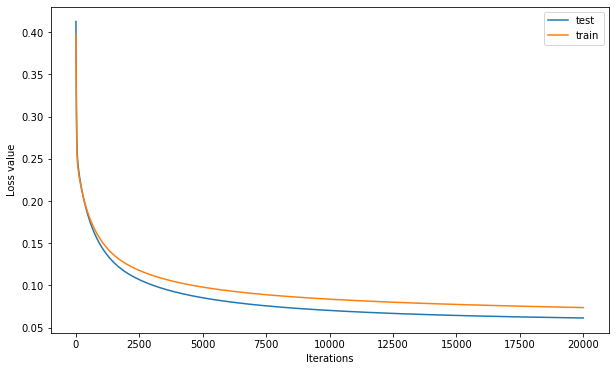

In [271]:
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e5, label="test")
plt.plot(L_iters_train_e5, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

## 4. Plot the learning curve with λ=0.0001 [1pt]<ht>

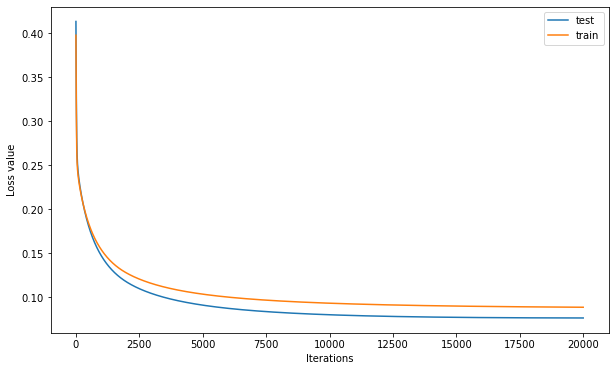

In [272]:
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e4, label="test")
plt.plot(L_iters_train_e4, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

## 5. Plot the learning curve with λ=0.001 [1pt]

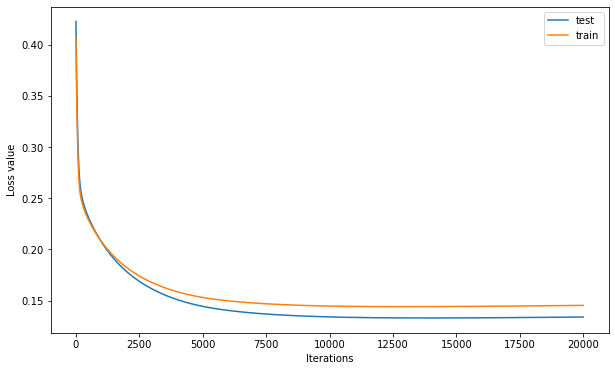

In [273]:
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e3, label="test")
plt.plot(L_iters_train_e3, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

## 6. Plot the learning curve with λ=0.01 [1pt]

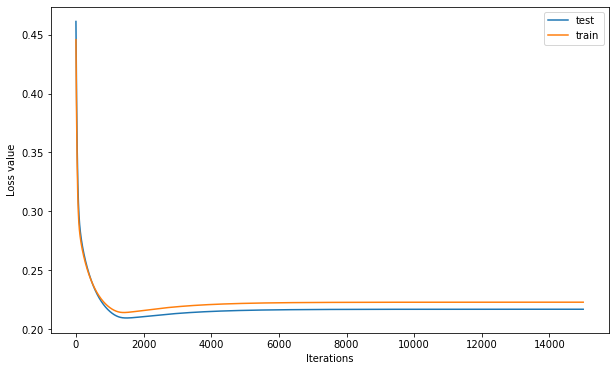

In [274]:
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e2, label="test")
plt.plot(L_iters_train_e2, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

## 7. Plot the learning curve with λ=0.1 [1pt]

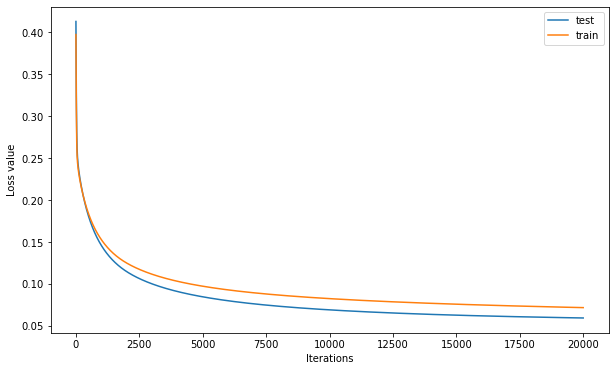

In [251]:
plt.figure(4, figsize=(10,6))
plt.plot(L_iters_test_e1, label="test")
plt.plot(L_iters_train_e1, label="train")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend()
plt.show()

## 8. Plot the probability map of the obtained classifier with λ=0.00001[1pt]

## 9. Plot the probability map of the obtained classifier with λ=0.0001[1pt]

## 10. Plot the probability map of the obtained classifier with λ=0.001[1pt]

## 11. Plot the probability map of the obtained classifier with λ=0.01[1pt]

## 12. Plot the probability map of the obtained classifier with λ=0.1[1pt]

## 13. Print the final training accuracy with the given regularization parameters [2.5pt]

## 14. Print the final testing accuracy with the given regularization parameters [2.5pt]